In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Read in the csv
airbnb_df = pd.read_csv('listings_clean_nan.csv')
airbnb_df.head()

,Unnamed: 0,source,name,host_id,host_url,host_name,host_since,host_location,host_response_time,host_response_rate,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month
0,0,city scrape,Home in Kapaau · ★4.94 · Studio · 1 bed · 1 bath,31314577,https://www.airbnb.com/users/show/31314577,Marc,4/16/2015,"Waimea, HI",within an hour,100%,...,4.81,5.0,4.88,4.88,4.81,f,4,4,0,1.41
1,1,city scrape,Rental unit in Pahala · ★4.56 · 2 bedrooms · 2...,13268454,https://www.airbnb.com/users/show/13268454,Madaline,3/18/2014,"San Francisco, CA",a few days or more,0%,...,4.56,5.0,4.78,4.33,4.44,f,1,1,0,0.09
2,2,city scrape,Cabin in Mountain View · 1 bedroom · 2 beds · ...,251605183,https://www.airbnb.com/users/show/251605183,Kathleen,3/27/2019,"Kurtistown, HI",within an hour,100%,...,NaN,NaN,NaN,NaN,NaN,t,3,1,2,NaN
3,3,city scrape,Home in Kailua-Kona · 2 bedrooms · 3 beds · 1 ...,504489199,https://www.airbnb.com/users/show/504489199,Kelly And Zain,3/8/2023,"Kailua-Kona, HI",within an hour,100%,...,NaN,NaN,NaN,NaN,NaN,f,3,3,0,NaN
4,4,city scrape,Rental unit in Waikoloa Village · ★New · 1 bed...,336576760,https://www.airbnb.com/users/show/336576760,Tim,2/16/2020,"Myrtle Beach, SC",within a few hours,97%,...,NaN,NaN,NaN,NaN,NaN,f,79,79,0,NaN


In [3]:
# Look at the shape
airbnb_df.shape

(34040, 61)

In [4]:
# Look at what would drop
airbnb_df.dropna().shape

(0, 61)

In [5]:
# Look at the columns
airbnb_df.columns

Index(['Unnamed: 0', 'source', 'name', 'host_id', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms_text',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of

In [6]:
#Create a Data Frame with need columns for ML algorithm
airbnb_sh_df = airbnb_df [['host_response_rate','host_acceptance_rate','host_is_superhost',
            'host_has_profile_pic','host_identity_verified','price',
            'has_availability','review_scores_rating','instant_bookable','reviews_per_month']]
airbnb_sh_df.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,price,has_availability,review_scores_rating,instant_bookable,reviews_per_month
0,100%,98%,t,t,t,$175.00,t,4.94,f,1.41
1,0%,0%,f,t,f,$225.00,t,4.56,f,0.09
2,100%,93%,f,t,t,$100.00,t,NaN,t,NaN
3,100%,97%,t,t,t,$102.00,t,NaN,f,NaN
4,97%,21%,t,t,t,$209.00,t,NaN,f,NaN


In [7]:
# Look at counts
airbnb_sh_df.count()

host_response_rate        31487
host_acceptance_rate      32403
host_is_superhost         34018
host_has_profile_pic      34038
host_identity_verified    34038
price                     32748
has_availability          32748
review_scores_rating      25869
instant_bookable          34040
reviews_per_month         25858
dtype: int64

In [8]:
# Drop NA rows
airbnb_sh_df_dna = airbnb_sh_df.dropna()

In [9]:
# Look at Counts after dropping NAs
airbnb_sh_df_dna.count()

host_response_rate        23548
host_acceptance_rate      23548
host_is_superhost         23548
host_has_profile_pic      23548
host_identity_verified    23548
price                     23548
has_availability          23548
review_scores_rating      23548
instant_bookable          23548
reviews_per_month         23548
dtype: int64

In [10]:
#Look at datatypes
airbnb_sh_df_dna.dtypes

host_response_rate         object
host_acceptance_rate       object
host_is_superhost          object
host_has_profile_pic       object
host_identity_verified     object
price                      object
has_availability           object
review_scores_rating      float64
instant_bookable           object
reviews_per_month         float64
dtype: object

In [11]:
# Look at shape
airbnb_sh_df_dna.shape

(23548, 10)

In [12]:
# Convert host response rate to integer
airbnb_sh_df_dna.host_response_rate = airbnb_sh_df_dna.host_response_rate.str.replace('%','').astype('int')

<ipython-input-12-54c2f90b8817>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_sh_df_dna.host_response_rate = airbnb_sh_df_dna.host_response_rate.str.replace('%','').astype('int')


In [13]:
# Convert host acceptance rate to integer
airbnb_sh_df_dna.host_acceptance_rate = airbnb_sh_df_dna.host_acceptance_rate.str.replace('%','').astype('int')

<ipython-input-13-f5f00195ee1b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_sh_df_dna.host_acceptance_rate = airbnb_sh_df_dna.host_acceptance_rate.str.replace('%','').astype('int')


In [14]:
# Convert price to float
airbnb_sh_df_dna['price'] = airbnb_sh_df_dna['price'].str.replace('$', '').str.replace(',', '').astype('float64')

<ipython-input-14-8c748fc9adf3>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  airbnb_sh_df_dna['price'] = airbnb_sh_df_dna['price'].str.replace('$', '').str.replace(',', '').astype('float64')
<ipython-input-14-8c748fc9adf3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_sh_df_dna['price'] = airbnb_sh_df_dna['price'].str.replace('$', '').str.replace(',', '').astype('float64')


In [15]:
# Encode Super Host column
airbnb_sh_df_dna['host_is_superhost'] = airbnb_sh_df_dna['host_is_superhost'].replace({'t': 1, 'f': 0})

<ipython-input-15-7d0b6d9b1c51>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_sh_df_dna['host_is_superhost'] = airbnb_sh_df_dna['host_is_superhost'].replace({'t': 1, 'f': 0})


In [16]:
# Encode Host Profile column
airbnb_sh_df_dna['host_has_profile_pic'] = airbnb_sh_df_dna['host_has_profile_pic'].replace({'t': 1, 'f': 0})

<ipython-input-16-44ddbe2c9fdf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_sh_df_dna['host_has_profile_pic'] = airbnb_sh_df_dna['host_has_profile_pic'].replace({'t': 1, 'f': 0})


In [17]:
# Encode Host Identity column
airbnb_sh_df_dna['host_identity_verified'] = airbnb_sh_df_dna['host_identity_verified'].replace({'t': 1, 'f': 0})

<ipython-input-17-02b13476c36a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_sh_df_dna['host_identity_verified'] = airbnb_sh_df_dna['host_identity_verified'].replace({'t': 1, 'f': 0})


In [18]:
# Encode Availability column
airbnb_sh_df_dna['has_availability'] = airbnb_sh_df_dna['has_availability'].replace({'t': 1, 'f': 0})

<ipython-input-18-c32fde23859f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_sh_df_dna['has_availability'] = airbnb_sh_df_dna['has_availability'].replace({'t': 1, 'f': 0})


In [19]:
# Encode Instant Bookable column
airbnb_sh_df_dna['instant_bookable'] = airbnb_sh_df_dna['instant_bookable'].replace({'t': 1, 'f': 0})

<ipython-input-19-1f76a0b049e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_sh_df_dna['instant_bookable'] = airbnb_sh_df_dna['instant_bookable'].replace({'t': 1, 'f': 0})


In [20]:
# View Updated Data Frame
airbnb_sh_df_dna

,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,price,has_availability,review_scores_rating,instant_bookable,reviews_per_month
0,100,98,1,1,1,175.0,1,4.94,0,1.41
1,0,0,0,1,0,225.0,1,4.56,0,0.09
6,100,100,1,1,0,800.0,1,4.82,1,0.51
7,100,100,1,1,1,500.0,1,4.85,1,0.91
8,100,100,1,1,1,125.0,1,4.96,0,2.74
...,...,...,...,...,...,...,...,...,...,...
34034,89,99,0,1,0,288.0,1,4.81,1,1.35
34035,100,99,0,1,1,292.0,1,5.00,0,0.13
34036,100,98,1,1,1,345.0,1,5.00,1,1.72
34038,100,100,0,1,1,600.0,1,5.00,0,0.59


In [21]:
#Look at datatypes
airbnb_sh_df_dna.dtypes

host_response_rate          int64
host_acceptance_rate        int64
host_is_superhost           int64
host_has_profile_pic        int64
host_identity_verified      int64
price                     float64
has_availability            int64
review_scores_rating      float64
instant_bookable            int64
reviews_per_month         float64
dtype: object

In [39]:
# Create X and y
X = airbnb_sh_df_dna.drop('host_is_superhost', axis=1)
y = airbnb_sh_df_dna['host_is_superhost']
# Split the data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=19)
# Scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# Create a Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
# Train the Random Forest classifier
rf.fit(X_train, y_train)
# Evaluate the Random Forest classifier
y_pred = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred)
print('Accuracy of the Random Forest classifier:', accuracy_rf)


Accuracy of the Random Forest classifier: 0.7791744521827756


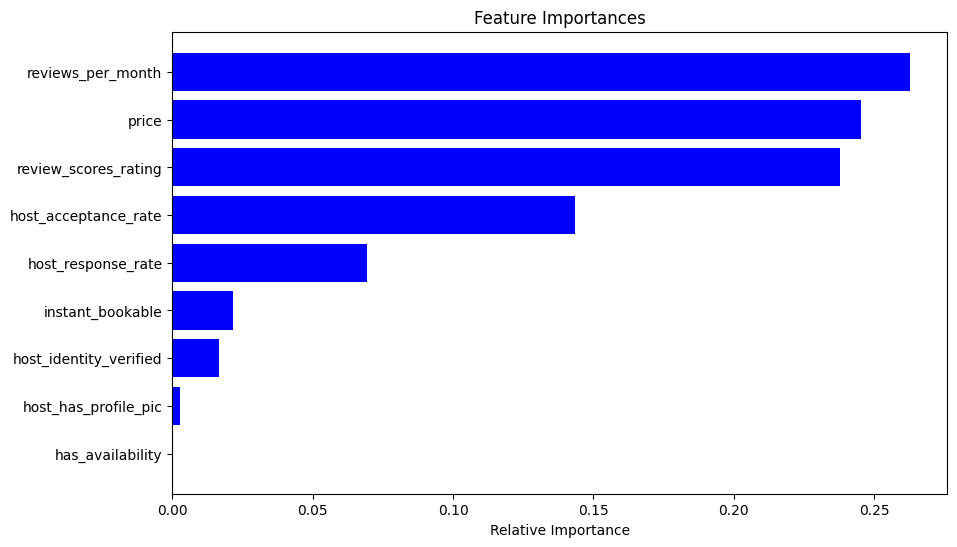

In [40]:
# Plot the feature importances of the Random Forest classifier
importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(features)), importances[indices], color='b', align='center')
plt.yticks(range(len(features)), features[indices])
plt.xlabel('Relative Importance')
plt.show()
